In [2]:
import pandas as pd

data = {
    'Weather': [
        'Sunny', 'Rainy', 'Overcast', 'Sunny', 'Rainy', 'Sunny',
        'Overcast', 'Rainy', 'Sunny', 'Rainy'  # Trimmed to 10
    ],
    'TimeOfDay': [
        'Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Morning',
        'Morning', 'Afternoon', 'Evening', 'Morning'
    ],
    'SleepQuality': [
        'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good',
        'poor', 'Good', 'Good', 'Poor'
    ],
    'Mood': [
        'Tired', 'Fresh', 'Tired', 'Energetic', 'Tired', 'Fresh',
        'Tired', 'Tired', 'Energetic', 'Tired'
    ],
    'BuyCoffee': [
        'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'No', 'Yes'
    ]
}

df = pd.DataFrame(data)
print(df)


    Weather  TimeOfDay SleepQuality       Mood BuyCoffee
0     Sunny    Morning         Poor      Tired       Yes
1     Rainy    Morning         Good      Fresh        No
2  Overcast  Afternoon         Poor      Tired       Yes
3     Sunny  Afternoon         Good  Energetic        No
4     Rainy    Evening         Poor      Tired       Yes
5     Sunny    Morning         Good      Fresh        No
6  Overcast    Morning         poor      Tired       Yes
7     Rainy  Afternoon         Good      Tired       Yes
8     Sunny    Evening         Good  Energetic        No
9     Rainy    Morning         Poor      Tired       Yes


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [4]:
df_encoded = df.copy()
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [6]:
x = df_encoded.drop('BuyCoffee', axis=1)  # Corrected column name
y = df_encoded['BuyCoffee']

In [7]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

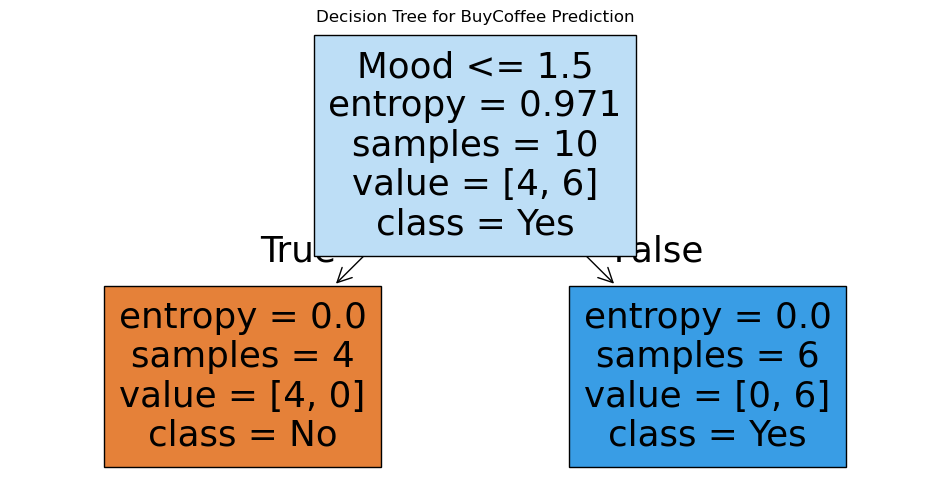

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree  # <== Import this

plt.figure(figsize=(12, 6))
plot_tree(model,feature_names=x.columns,class_names=label_encoders['BuyCoffee'].classes_,filled=True)
plt.title('Decision Tree for BuyCoffee Prediction')
plt.show()
